In [44]:
import matplotlib.pyplot as plt
import numpy as np


In [45]:
BCUKET_SIZE = 60

hdrvdp_matrix_adress = ".\\Images_and_Data\\Bundle_01\\hdrvdp_09_hdrvdp_matrix.npy"
hdrvdp_matrix = np.load(hdrvdp_matrix_adress)

single_grayscale_cnn_matrix_adress = ".\\Images_and_Data\\Bundle_01\\mixed_09_single_grayscale_cnn_matrix.npy"
single_grayscale_cnn_matrix = np.load(single_grayscale_cnn_matrix_adress)


print(single_grayscale_cnn_matrix)


[[5.08530498e-01 9.45650786e-01 9.25441384e-02 1.68925524e-03
  5.17406315e-01 3.09572220e-02 5.70118427e-04 9.90531534e-01
  8.42654675e-01 8.74107450e-01 9.28108484e-01 9.98107255e-01
  2.36135304e-01 1.84339285e-03 5.72723150e-03 1.87534094e-03
  8.31770897e-03 4.75237370e-02 1.47228837e-02 8.78544211e-01
  8.51843953e-01 1.83668733e-01 8.59677792e-02 2.96777487e-03
  6.52865171e-02 1.03835464e-02 1.25874281e-02 2.63850212e-01
  5.12686521e-01 9.76838410e-01 9.81638968e-01 9.73077893e-01]
 [8.48191410e-01 9.22239780e-01 9.81719047e-01 9.91285145e-01
  5.08167177e-01 9.88297462e-01 5.69600284e-01 9.91778433e-01
  2.03931332e-03 2.92037725e-02 8.95837754e-01 9.29724246e-01
  1.96506143e-01 9.95986104e-01 8.89477462e-01 9.96391475e-01
  9.96713221e-01 9.81513679e-01 5.15300035e-03 1.13360882e-02
  9.84708607e-01 2.99320221e-02 7.20397294e-01 2.17247009e-03
  1.50215626e-03 7.48225629e-01 9.09738928e-01 7.62927532e-03
  9.89881963e-01 9.84963059e-01 9.78270411e-01 9.57394451e-01]
 [6.77

In [46]:
x_values = [x for x in range(32)]
y_values = [x for x in range(18)]


In [47]:
X, Y = np.meshgrid(x_values, y_values)

In [48]:
# X

In [49]:
# Y

In [50]:
# plt.scatter(X, Y)

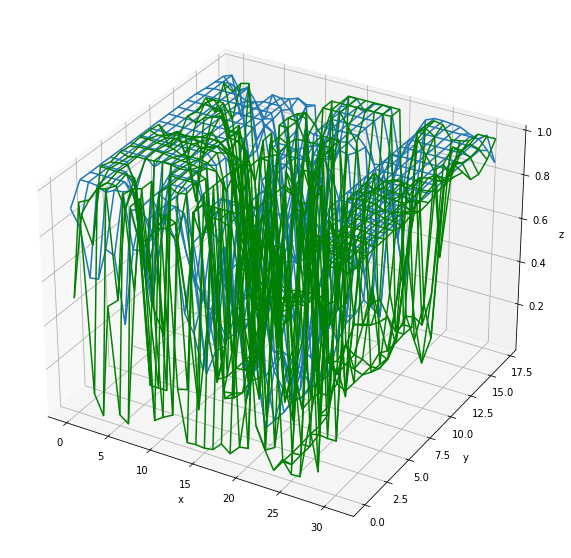

In [51]:
plt.rcParams["figure.figsize"] = (15, 10)
ax = plt.axes(projection="3d")

ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")


ax.plot_wireframe(X, Y, hdrvdp_matrix)
ax.plot_wireframe(X, Y,  single_grayscale_cnn_matrix, color="green")


## Weitere Idee: Differenzmatrix

Matrizen voneinander abziehen und eine Ergebnismap ausgeben. 
Farblich kennzeichnen, ob HDRVDP höhere Wahrscheinlichkeit für visuelle Wahrnehmbarkeit als CNN oder niedrigere vorhersagt

# TODO: Matrizen aneinander angleichen!?

In [52]:
single_grayscale_cnn_matrix.max()

0.9997866451740265

In [53]:
hdrvdp_matrix.max()

1.0

In [54]:
differenzmatrix = hdrvdp_matrix - single_grayscale_cnn_matrix
differenzmatrix.min()

-0.8075579655949603

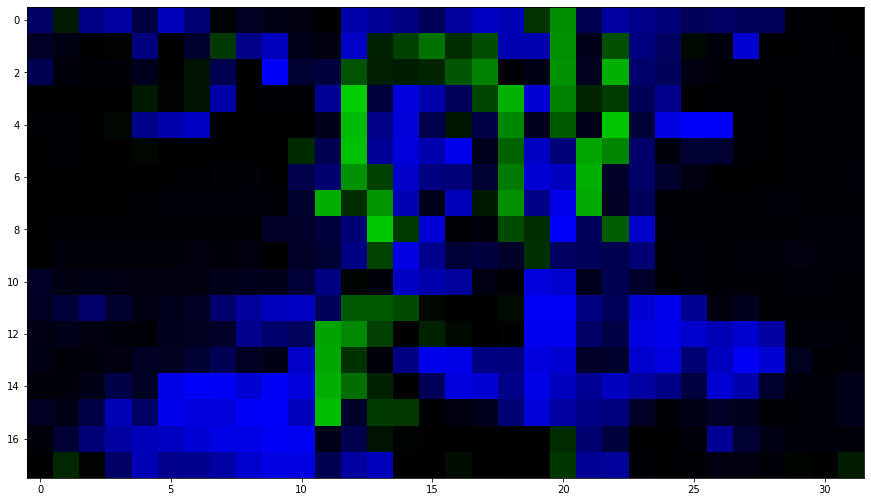

In [55]:
differenzmatrix_img = np.zeros((18, 32, 3))


for y in range(18):
    for x in range(32):
        current_value = differenzmatrix[y][x]
        current_color = [0,0,0]

        if current_value == 0:
            # hdrvdp und CNN sind zum gleichen Ergebnis gekommen -> schwarz
            current_color = [0,0,0]

        if current_value > 0:
            # hdrvdp ist zu größerem Ergebnis gekommen -> blau
            blue_channel = abs(current_value)
            current_color = [0,0,blue_channel]

        if current_value < 0:
            # cnn ist zu größerem Ergebnis gekommen -> grün
            green_channel = abs(current_value)
            current_color = [0,green_channel,0]
        
        differenzmatrix_img[y][x] = current_color


plt.imshow(differenzmatrix_img)
plt.show()





